In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing import image
import cv2
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
from PIL import Image, ImageOps


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_df=pd.read_csv('/content/drive/My Drive/df_pre1.csv')
data_test=pd.read_csv('/content/drive/My Drive/df_pretest.csv')

In [ ]:

data_df=data_df.sample(frac=1).reset_index(drop=True)
data_test=data_test.sample(frac=1).reset_index(drop=True)

In [ ]:
data_test['LABEL'].value_counts()

BACTERIA    242
NORMAL      234
VIRUS       148
Name: LABEL, dtype: int64

In [ ]:
# Data Augmentation
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      
      rotation_range=40,
     
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
     )

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    data_df,x_col="IMAGE",y_col="LABEL",
    target_size=(150,150),
    color_mode='grayscale', #we use grayscale images I think
    batch_size=32,
    class_mode='categorical',
    shuffle=True, #we shuffle our images for better performance
    seed=8)

Found 5216 validated image filenames belonging to 3 classes.


In [ ]:
test_generator = train_datagen.flow_from_dataframe(
    data_test,x_col="IMAGE",y_col="LABEL",
    target_size=(150,150),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=8)

Found 624 validated image filenames belonging to 3 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
checkpoint1_3 = ModelCheckpoint("me.h5",
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
earlystop1_3 = EarlyStopping(monitor = 'val_accuracy', 
                            mode="max",
                            min_delta = 0, 
                            patience = 8,
                            verbose = 1)

tensorboard1_3 = TensorBoard(log_dir='Molvisualization')

callbacks_1_3 = [checkpoint1_3,earlystop1_3,tensorboard1_3]

Using TensorFlow backend.


In [ ]:
import keras.backend as K
def auc1(y_true, y_pred):
 if len(np.unique(y_true[:,1])) == 1:
    return 0.5
 else:
    return roc_auc_score(y_true, y_pred)
def auroc(y_true, y_pred):
 return tf.compat.v1.py_func(auc1, (y_true, y_pred), tf.double)
def f1_metric(y_true, y_pred):
 true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
 possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
 predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
 precision = true_positives / (predicted_positives + K.epsilon())
 recall = true_positives / (possible_positives + K.epsilon())
 f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
 return f1_val


In [ ]:
from numpy.random import seed

from keras.layers import Input, Dense,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from keras.models import Model
import random as rn

In [ ]:
from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping
from numpy.random import seed
import random as rn
import tensorflow.keras.backend as K
import tensorflow as tf
import tensorflow

In [ ]:
#Input layer
sess = tensorflow.compat.v1.Session()
tensorflow.keras.backend.clear_session()
sess.close()
sess = tensorflow.compat.v1.Session()
seed(1)
tensorflow.random.set_seed(2)
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1),kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu',kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 3 , activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 128)      

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy',f1_metric])

In [ ]:
from keras import initializers

In [ ]:
import keras

In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(data_df['LABEL']),
                                                 data_df['LABEL'])

In [ ]:
class_weights

array([0.68722003, 1.29654487, 1.29268897])

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size
history=model.fit_generator(generator=train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                  validation_data=test_generator,
 validation_steps=STEP_SIZE_VALID,
                    epochs=30,callbacks=callbacks_1_3,class_weight=class_weights)

Epoch 1/30
 95/163 [================>.............] - ETA: 16:34 - loss: 2.1316 - accuracy: 0.5207 - f1_metric: 0.3718

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 134 could not be retrieved. It could be because a worker has died.
  UserWarning)


163/163 [==============================] - 2493s 15s/step - loss: 1.6010 - accuracy: 0.5623 - f1_metric: 0.4503 - val_loss: 0.8813 - val_accuracy: 0.5674 - val_f1_metric: 0.5258

Epoch 00001: val_accuracy improved from -inf to 0.56743, saving model to me.h5
Epoch 2/30
163/163 [==============================] - 103s 635ms/step - loss: 0.7816 - accuracy: 0.6551 - f1_metric: 0.6182 - val_loss: 1.0341 - val_accuracy: 0.6014 - val_f1_metric: 0.5799

Epoch 00002: val_accuracy improved from 0.56743 to 0.60135, saving model to me.h5
Epoch 3/30
163/163 [==============================] - 105s 645ms/step - loss: 0.7384 - accuracy: 0.6802 - f1_metric: 0.6549 - val_loss: 0.6573 - val_accuracy: 0.6470 - val_f1_metric: 0.6208

Epoch 00003: val_accuracy improved from 0.60135 to 0.64696, saving model to me.h5
Epoch 4/30
163/163 [==============================] - 105s 643ms/step - loss: 0.7108 - accuracy: 0.6940 - f1_metric: 0.6712 - val_loss: 1.1849 - val_accuracy: 0.6436 - val_f1_metric: 0.6223

Epoch

In [ ]:
a=model.predict_generator(test_generator,20)
len(a)

624

In [ ]:
y_pred=np.argmax(a,axis=1)

In [ ]:
data_test=pd.read_csv('/content/drive/My Drive/df_pretest.csv')
cleanup_nums = {"LABEL":     {'NORMAL': 0,'BACTERIA':1,'VIRUS':2}}
data_test.replace(cleanup_nums, inplace=True)
data_test.head()

,IMAGE,LABEL
0,/content/drive/My Drive/test/NORMAL/IM-0001-00...,0
1,/content/drive/My Drive/test/NORMAL/IM-0003-00...,0
2,/content/drive/My Drive/test/NORMAL/IM-0005-00...,0
3,/content/drive/My Drive/test/NORMAL/IM-0006-00...,0
4,/content/drive/My Drive/test/NORMAL/IM-0007-00...,0


In [ ]:
y_true=data_test['LABEL']

In [ ]:
y_true=np.asarray(y_true)

In [ ]:
y_true=np.sort(y_true)

In [ ]:
y_pred=np.sort(y_pred)

In [ ]:
np.count_nonzero(y_true)

390

In [ ]:
np.count_nonzero(y_pred)

316

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[234   0   0]
 [ 74 168   0]
 [  0  23 125]]


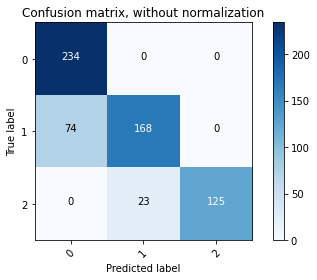

In [ ]:
cnf_matrix = confusion_matrix(y_true,y_pred,labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2],
                      title='Confusion matrix, without normalization')